<a href="https://colab.research.google.com/github/Salman-Dev336/AI-lab-course/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6631 - loss: 0.6006 - val_accuracy: 0.8012 - val_loss: 0.4267
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8788 - loss: 0.3082 - val_accuracy: 0.8830 - val_loss: 0.3006
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9492 - loss: 0.1479 - val_accuracy: 0.8676 - val_loss: 0.3510
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9741 - loss: 0.0821 - val_accuracy: 0.8818 - val_loss: 0.4048
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8622 - loss: 0.3353
Test Accuracy: 0.86


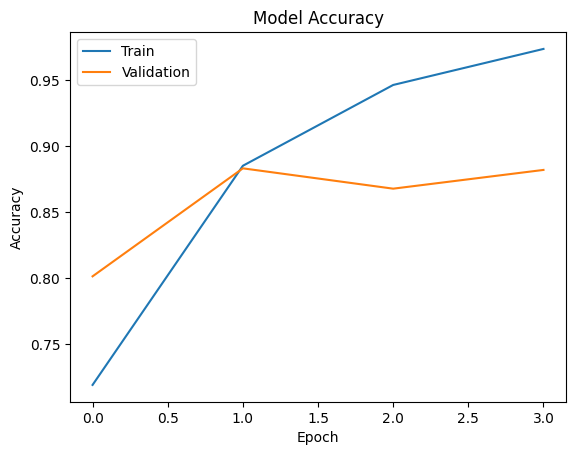

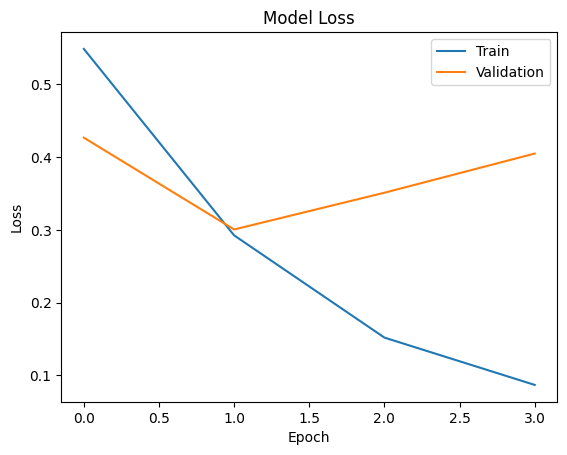

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted Sentiment: Negative


In [8]:
# 1. Import libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 2. Set parameters
max_features = 50000
maxlen = 500

# 3. Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# 5. Build improved model (using LSTM)
model = Sequential()
model.add(Embedding(max_features, 50))  # Increased embedding dimension

# LSTM layer
model.add(LSTM(50))
model.add(Dropout(0.5))     # to reduce overfitting

# Output layer
model.add(Dense(1, activation='sigmoid'))


# 6. Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# 7. Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=50,
    validation_split=0.2,
    callbacks=[early_stop]
)

# 8. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# 9. Plots
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 10. Prediction on test sample
sample_review = x_test[0]
sample_review_input = np.expand_dims(sample_review, axis=0)
prediction = model.predict(sample_review_input)[0][0]

if prediction > 0.5:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")

